### Student Information
Name:黃梓寧

Student ID:109061648

GitHub ID:duncan1315

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

### Begin Assignment Here



In [76]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [78]:
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [79]:
print(X.query('category == "1"'),'\n\n') #method1

print(X.head()) #method2, default=5








                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphi

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [131]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [81]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

ANS:  
A is np.nan equal to missing value  
B E None is NonType  
C,D,F is  simply string, that's why .isnull() didn't work

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [82]:
len(X)

2257

In [83]:
X_sample = X.sample(n=1000)
print(X_sample[0:9],'\n\n')
print(len(X_sample),'\n\n')
print(len(X))

                                                   text  category  \
1691  From: noye@midway.uchicago.edu (vera shanti no...         3   
628   From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2   
601   From: reedr@cgsvax.claremont.edu Subject: Re: ...         3   
1974  Subject: Teenage acne From: pchurch@swell.actr...         2   
1941  From: qtm2w@virginia.edu (Quinn T. McCord) Sub...         3   
1575  From: tmc@spartan.ac.BrockU.CA (Tim Ciceran) S...         1   
1102  From: andrew@calvin.dgbt.doc.ca (Andrew Patric...         2   
547   From: jroberts@ux4.cso.uiuc.edu (Robertson) Su...         1   
291   From: chrisb@tafe.sa.edu.au (Chris BELL) Subje...         0   

               category_name  
1691  soc.religion.christian  
628                  sci.med  
601   soc.religion.christian  
1974                 sci.med  
1941  soc.religion.christian  
1575           comp.graphics  
1102                 sci.med  
547            comp.graphics  
291              alt.atheism  

ANS:  
There is no change in len(X) after sampling.  
Thus, we can find out that sampling doesn't delete the text in original file X.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

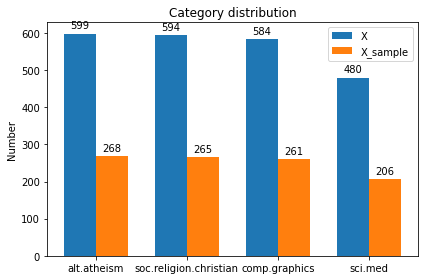

In [84]:
import matplotlib.pyplot as plt

labels = categories
X_means = X.category_name.value_counts()
sample_means = X_sample.category_name.value_counts()

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, X_means, width, label='X')
rects2 = ax.bar(x + width/2, sample_means, width, label='X_sample')

ax.set_ylabel('Number')
ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [178]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [183]:
X_list=X_counts[4:5, 0:100].toarray()
X_list=X_list[0].tolist()
print(X_list)



[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [186]:
for index, freq in enumerate(X_list):
    if freq != int(0):
        print('index:',index,'\n','freq:',freq)
        print('term:',count_vect.get_feature_names()[index],'\n\n')



index: 0 
 freq: 1
teem: 00 


index: 37 
 freq: 1
teem: 01 




It's 37th in the term matrix , and the word is '01'.

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [189]:
len(count_vect.get_feature_names())

35788

In [190]:
len(list(X.index))

2257

In [193]:
X_counts.shape

(2257, 35788)

In [192]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:len(count_vect.get_feature_names())]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:len(list(X.index))]]
plot_z = X_counts[0:len(count_vect.get_feature_names()), 0:len(list(X.index))].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

TypeError: 'int' object is not iterable

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

### >>> ** homework part 2:**  
#New dataset code begin here#


In [85]:
import jupyter
import numpy as np
import pandas as pd
import matplotlib as mpl
import plotly 
import nltk
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [86]:
import helpers.data_mining_helpers as dmh


In [87]:
df1 = pd.read_csv(
    'amazon_cells_labelled.txt',  sep='\t',header=None)
df2 = pd.read_csv(
    'imdb_labelled.txt',  sep='\t',header=None)
df3 = pd.read_csv(
    'yelp_labelled.txt',  sep='\t',header=None)

df = pd.concat([df1,df2,df3],axis=0,ignore_index = True)
df.columns = ['text', 'score']

print(len(df1),'\n')
print(len(df2),'\n')
print(len(df3),'\n')
print(df)

1000 

748 

1000 

                                                   text  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2743  I think food should have flavor and texture an...      0
2744                           Appetite instantly gone.      0
2745  Overall I was not impressed and would not go b...      0
2746  The whole experience was underwhelming, and I ...      0
2747  Then, as if I hadn't wasted enough of my life ...      0

[2748 rows x 2 columns]


In [88]:
print(df.iloc[:5])
print('\n\n',df.iloc[2747]) #check last one
print('\n\n',df.loc[2747,'text'])


                                                text  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


 text     Then, as if I hadn't wasted enough of my life ...
score                                                    0
Name: 2747, dtype: object


 Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.


In [89]:
print(sum(df1.duplicated()),'\n')
print(sum(df2.duplicated()),'\n')
print(sum(df3.duplicated()),'\n')
print(sum(df.duplicated()))

10 

3 

4 

17


In [90]:
df[df.duplicated()]

,text,score
285,Great phone!.,1
407,Works great.,1
524,Works great!.,1
543,Don't buy this product.,0
744,If you like a loud buzzing to override all you...,0
748,Does not fit.,0
778,This is a great deal.,1
792,Great Phone.,1
892,Excellent product for the price.,1
896,Great phone.,1


In [91]:
print(df[df.duplicated()],'\n\n') #I want to check how is the dupicated text looks like.
print(df.duplicated())

                                                   text  score
285                                       Great phone!.      1
407                                        Works great.      1
524                                       Works great!.      1
543                             Don't buy this product.      0
744   If you like a loud buzzing to override all you...      0
748                                       Does not fit.      0
778                               This is a great deal.      1
792                                        Great Phone.      1
892                    Excellent product for the price.      1
896                                        Great phone.      1
1165                   Definitely worth checking out.        1
1387                                 Not recommended.        0
1590                                            10/10        1
2562                                 I love this place.      1
2564                             The food was terrible.

In [92]:

df.drop_duplicates(keep='first', inplace=True)

print(sum(df.duplicated()),'\n')
print(len(df),'\n')

0 

2731 



In [93]:
sample = df.sample(n=1000)
print(len(sample),'\n')
print(sample[0:4],'\n\n')
print(sample.iloc[999],'\n')



1000 

                                                   text  score
2016  Just as good as when I had it more than a year...      1
826                         Not as good as I had hoped.      0
1326  Full of unconvincing cardboard characters it i...      0
2246  Their monster chicken fried steak and eggs is ...      1 


text     I got to enjoy the seafood salad, with a fabul...
score                                                    1
Name: 2498, dtype: object 



1    1376
0    1355
Name: score, dtype: int64


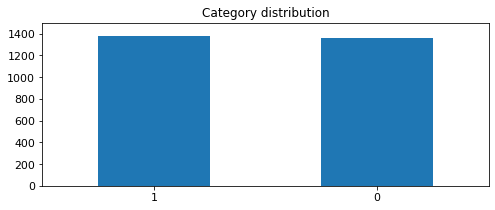

In [94]:
print(df.score.value_counts())

df.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1    506
0    494
Name: score, dtype: int64


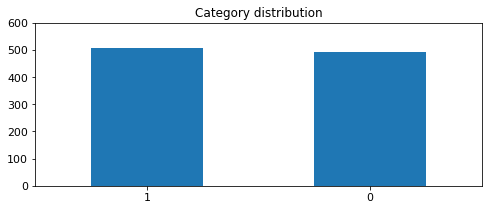

In [95]:
print(sample.score.value_counts())

sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [96]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [97]:
df[0:4]

,text,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [98]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [99]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

df_counts.shape

(2731, 5155)

In [100]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [101]:
df[0:5]

,text,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [102]:

feature_name = count_vect.get_feature_names()

print (feature_name,'\n\n')
print (len(feature_name),'\n\n')
print (df_counts,'\n\n')
print( df_counts[0:5, 0:100].toarray(),'\n\n')

rably', 'prejudice', 'prelude', 'premise', 'premium', 'prepare', 'prepared', 'preparing', 'presence', 'presentation', 'presents', 'preservation', 'president', 'pretentious', 'pretext', 'prettier', 'pretty', 'prevents', 'previous', 'price', 'priced', 'prices', 'pricey', 'pricing', 'primal', 'primary', 'prime', 'print', 'privileged', 'probably', 'problem', 'problems', 'procedure', 'procedures', 'proceedings', 'process', 'proclaimed', 'produce', 'produced', 'producer', 'producers', 'product', 'production', 'products', 'professional', 'professionals', 'professor', 'profiterole', 'profound', 'program', 'progresses', 'promise', 'promised', 'promote', 'prompt', 'prompted', 'promptly', 'prone', 'propaganda', 'properly', 'pros', 'protected', 'protection', 'protective', 'protector', 'protects', 'proud', 'proudly', 'proven', 'provide', 'provided', 'provides', 'providing', 'provokes', 'provoking', 'ps', 'ps3', 'pseudo', 'psyched', 'psychological', 'psychotic', 'pub', 'public', 'publicly', 'pucks',

In [103]:
feature_name[4531]  #Use this code to check what tern it is 

'the'

In [104]:
count_vect.transform(['zillion zombiez']).toarray() #make sure it work

array([[0, 0, 0, ..., 1, 0, 1]])

In [105]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020']

In [106]:
plot_y = ["text_"+ str(i) for i in list(X.index)[0:50]]
plot_y

['text_0',
 'text_1',
 'text_2',
 'text_3',
 'text_4',
 'text_5',
 'text_6',
 'text_7',
 'text_8',
 'text_9',
 'text_10',
 'text_11',
 'text_12',
 'text_13',
 'text_14',
 'text_15',
 'text_16',
 'text_17',
 'text_18',
 'text_19',
 'text_20',
 'text_21',
 'text_22',
 'text_23',
 'text_24',
 'text_25',
 'text_26',
 'text_27',
 'text_28',
 'text_29',
 'text_30',
 'text_31',
 'text_32',
 'text_33',
 'text_34',
 'text_35',
 'text_36',
 'text_37',
 'text_38',
 'text_39',
 'text_40',
 'text_41',
 'text_42',
 'text_43',
 'text_44',
 'text_45',
 'text_46',
 'text_47',
 'text_48',
 'text_49']

In [107]:
plot_z = df_counts[0:50, 0:50].toarray()
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

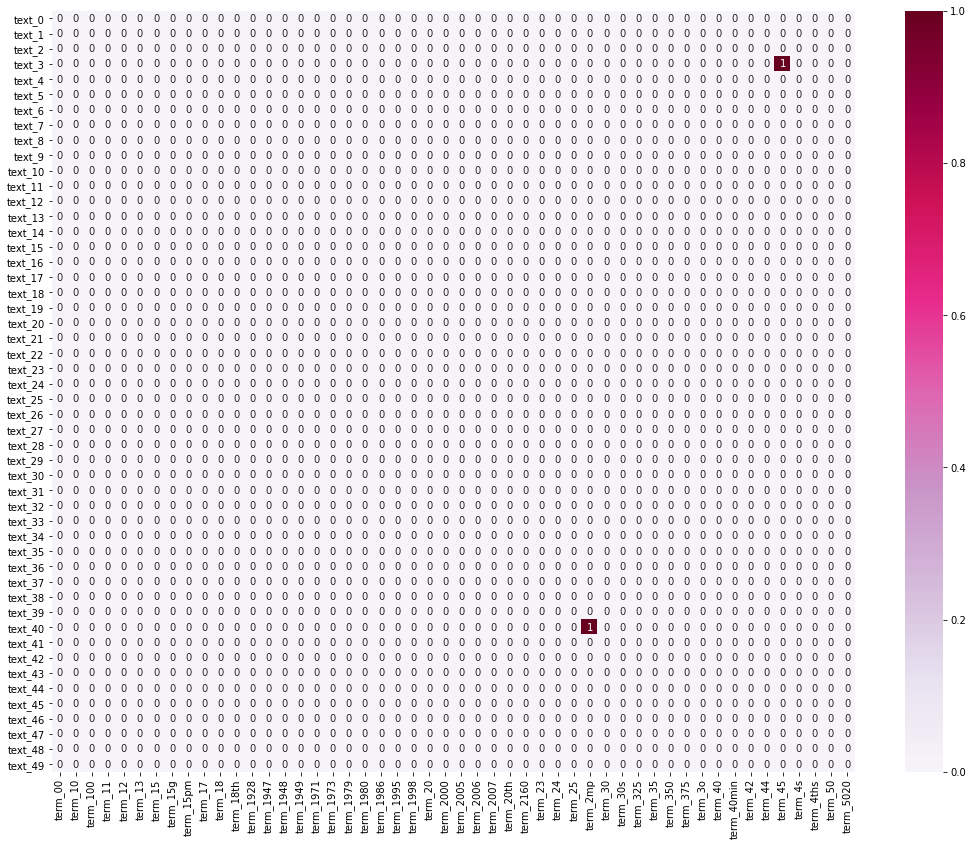

In [108]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [109]:
print(df_counts,'\n')
print(df_counts.shape,'\n')
print(type(df_counts))

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1
  (1, 1993)	1
  (1, 713)	1
  (1, 1603)	1
  (1, 4861)	1
  (2, 1829)	1
  (2, 4531)	1
  (2, 2023)	1
  :	:
  (2730, 4545)	1
  (2730, 4609)	1
  (2730, 2432)	1
  (2730, 2314)	1
  (2730, 4531)	3
  (2730, 647)	1
  (2730, 2282)	1
  (2730, 4542)	1
  (2730, 3097)	1
  (2730, 4974)	1
  (2730, 2982)	1
  (2730, 4593)	1
  (2730, 297)	1
  (2730, 3166)	1
  (2730, 2630)	1
  (2730, 1540)	1
  (2730, 4548)	1
  (2730, 785)	1
  (2730, 4630)	1
  (2730, 588)	1
  (2730, 2068)	1
  (2730, 3857)	1
  (2730, 3437)	1
  (2730, 5110)	1
  (2730, 1387)	1 

(2731, 5155) 

<class 'scipy.sparse.csr.csr_matrix'>


In [110]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)
print('\n',df_reduced)

(2731, 2)

 [[ 0.72799562  1.10427638]
 [-1.02331694  0.02680948]
 [-0.28398826 -0.01132808]
 ...
 [-0.51044242 -0.57723932]
 [ 0.31366257 -0.75867718]
 [ 2.17412644  0.34663278]]


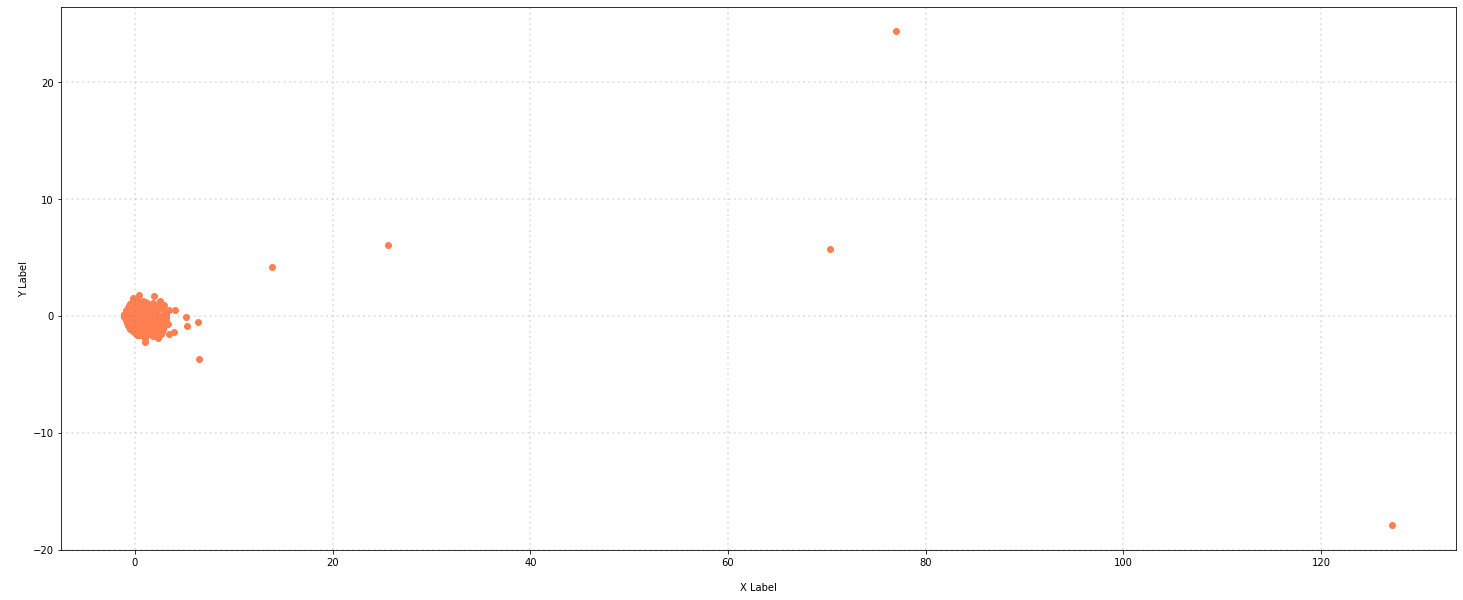

In [111]:
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

xs = df_reduced.T[0]
ys = df_reduced.T[1]
ax.scatter(xs, ys, c = 'coral', marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [112]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

print(term_frequencies,'\n\n')
print(len(term_frequencies),'\n\n')
print(term_frequencies[5154],'\n\n')

[ 1 36  3 ...  1  2  1] 


5155 


1 




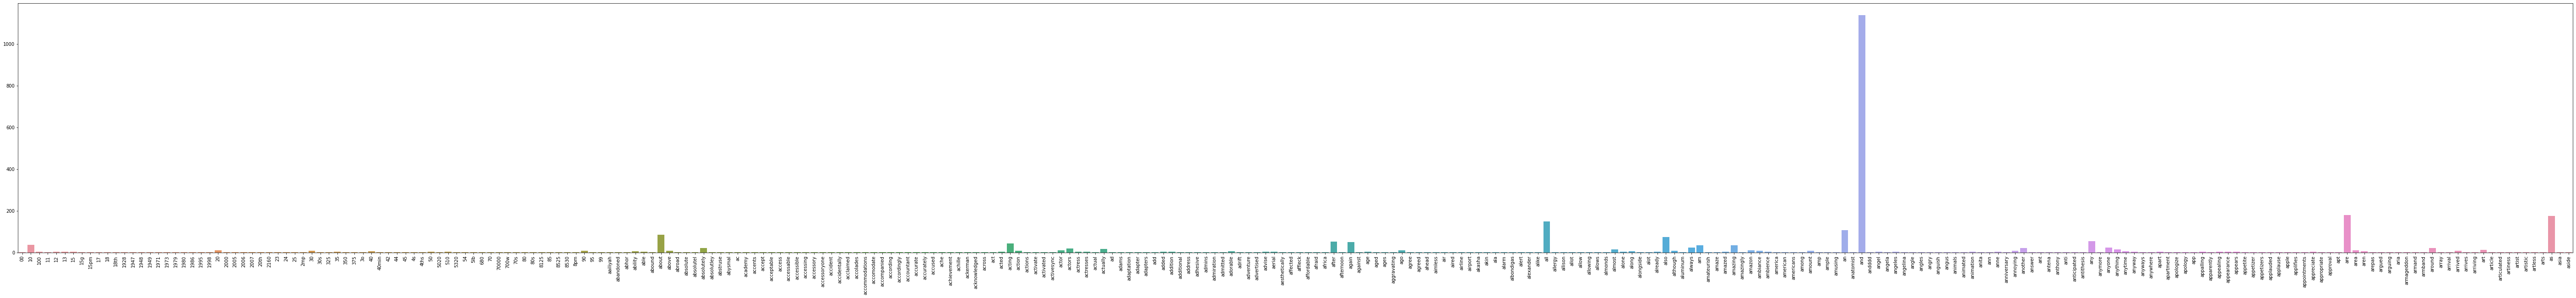

In [113]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [114]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

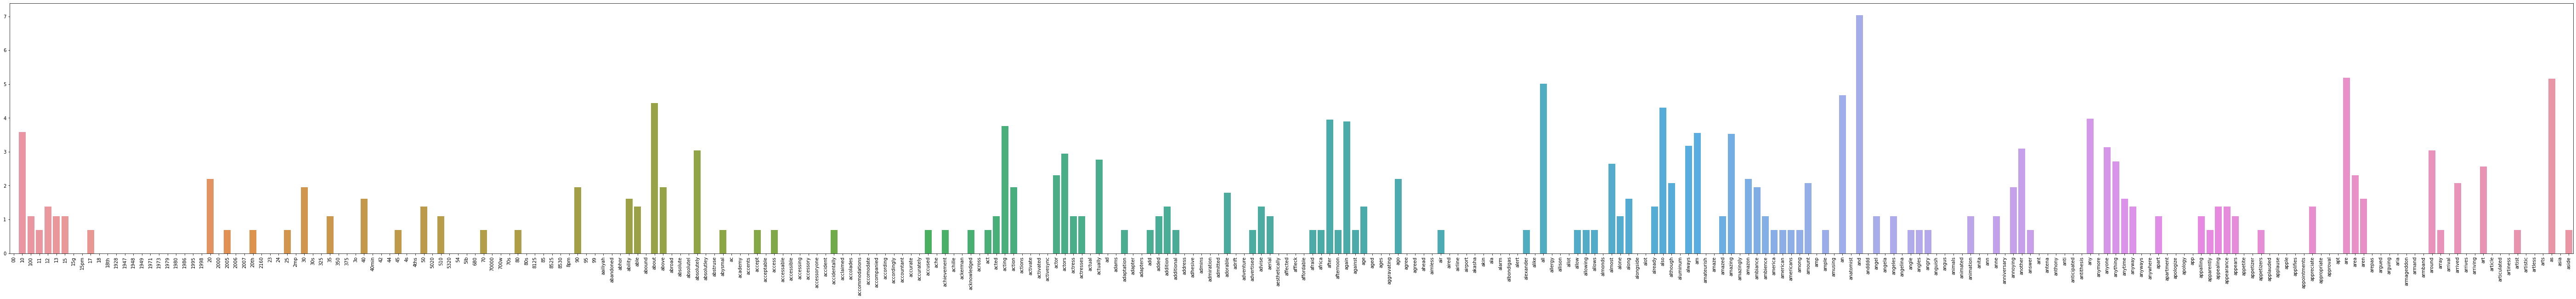

In [115]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [116]:
df.score

0       0
1       1
2       1
3       0
4       1
       ..
2743    0
2744    0
2745    0
2746    0
2747    0
Name: score, Length: 2731, dtype: int64

In [117]:
mlb = preprocessing.LabelBinarizer()
print('\n',mlb.fit(df.score),'\n\n')
print(mlb.classes_,'\n\n')


 LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False) 


[0 1] 




In [118]:
df['bin_category'] = mlb.transform(df['score']).tolist()
df[0:9]

,text,score,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


In [119]:
print(df.iloc[50],'\n\n')
print(df.iloc[100],'\n\n')
print(df.iloc[150],'\n\n')


text            Not loud enough and doesn't turn on like it sh...
score                                                           0
unigrams        [Not, loud, enough, and, does, n't, turn, on, ...
bin_category                                                  [0]
Name: 50, dtype: object 


text            Integrated seamlessly with the Motorola RAZR p...
score                                                           1
unigrams        [Integrated, seamlessly, with, the, Motorola, ...
bin_category                                                  [1]
Name: 100, dtype: object 


text                    I Was Hoping for More.
score                                        0
unigrams        [I, Was, Hoping, for, More, .]
bin_category                               [0]
Name: 150, dtype: object 




In [120]:
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [121]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [122]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
